In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrain[0].shape   

(28, 28)

In [ ]:
xtrain=xtrain/255
xtest=xtest/255

**Image is divided into 28 rows and 28 columns**

In [ ]:
xtrain.shape        

(60000, 28, 28)

There are 60K records for training and each record i.e image is further divided into 28 rows and 28 columns

In [ ]:
import matplotlib.pyplot as plt

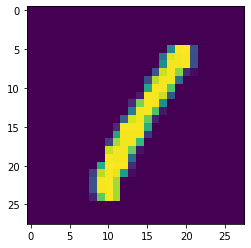

In [ ]:
plt.imshow(xtrain[3])
plt.show()

In [ ]:
ann=Sequential()
ann.add(Flatten(input_shape=(28,28)))
ann.add(Dense(units=128,activation="relu"))
ann.add(Dense(units=64,activation="relu"))

ann.add(Dense(units=10,activation="softmax"))

ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")


In [ ]:
ann.fit(xtrain,ytrain,epochs=30,validation_split=0.2)


Epoch 1/30
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2672 - accuracy: 0.9225 - val_loss: 0.1464 - val_accuracy: 0.9586
Epoch 2/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1132 - accuracy: 0.9657 - val_loss: 0.1066 - val_accuracy: 0.9684
Epoch 3/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0798 - accuracy: 0.9756 - val_loss: 0.1091 - val_accuracy: 0.9672
Epoch 4/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0582 - accuracy: 0.9819 - val_loss: 0.1060 - val_accuracy: 0.9697
Epoch 5/30
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0454 - accuracy: 0.9852 - val_loss: 0.0892 - val_accuracy: 0.9748
Epoch 6/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0370 - accuracy: 0.9884 - val_loss: 0.1023 - val_accuracy: 0.9732
Epoch 7/30
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0302 - accuracy: 0.9902 - val_loss: 0.1104 - val_acc

In [ ]:
ypred=ann.predict(xtest)
ypred

313/313 [==============================] - 1s 2ms/step


array([[1.6869428e-24, 3.1689104e-17, 1.4468701e-17, ..., 9.9999994e-01,
        1.1540405e-21, 6.0581546e-18],
       [1.4233170e-28, 5.2516747e-10, 9.9999994e-01, ..., 1.4234992e-24,
        2.7561991e-12, 1.4665421e-31],
       [1.0113713e-11, 9.9999827e-01, 7.5658901e-10, ..., 1.7055975e-06,
        5.4237614e-09, 6.5252615e-15],
       ...,
       [2.8924157e-22, 1.1300731e-18, 1.0617259e-20, ..., 3.8332362e-12,
        1.1344081e-13, 3.6566216e-14],
       [1.8662652e-23, 1.5796981e-29, 7.9238888e-36, ..., 6.6729598e-30,
        1.7143089e-13, 2.4061305e-25],
       [3.6699972e-28, 0.0000000e+00, 2.7348043e-33, ..., 0.0000000e+00,
        2.9106157e-27, 1.9160133e-28]], dtype=float32)

In [ ]:
ypred=ypred.argmax(axis=1)

In [ ]:
ypred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
ypred[3]

0

In [ ]:
ytest[3] #actual value

0

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.94      0.99      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.95      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

